In [1]:
import shutil
import fnmatch
import os
import numpy as np
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import glob
from sklearn.tree import DecisionTreeClassifier

"""
Script written for ECSE 415 Computer Vision Final project at McGill
@author HakimAmarouche
@version 1.0
This script converts all the images given in parameter DATA_ROOT into squared images with 
size 256 pixel by 256 pixel.
"""

# only modify this parameter
DATA_ROOT = './Data_Set/Set_1/JPG/faces' # Run face_detect to get a folder called faces and faces1

img_list = []
for root, dirnames, filenames in os.walk(DATA_ROOT):
    matches = fnmatch.filter(filenames, '*.jpg')
    for filename in matches:
        img_list.append(os.path.join(root, filename))

def convert_to_square(img):
        #get size
        height, width, channels = img.shape
        # Create a black image
        x = height if height > width else width
        y = height if height > width else width
        square= np.zeros((x,y,3), np.uint8)
        square[int((y-height)/2):y-int((y-height)/2), int((x-width)/2):int(x-(x-width)/2)] = img
        return square

# report the image processed 
print("Image list processed: ")
print(img_list)

for filename in img_list:
    origin_img = cv2.imread(filename)
    # print(filename)
    square = convert_to_square(origin_img)
    # skip the files that is corrupted, which OpenCV will return an empty image
    if square is None:
        print("File: "+filename+" is corrupted, skipped")
    else:
        square = cv2.resize(square,(256,256))
        cv2.imwrite(filename,square)
        






Image list processed: 
[]


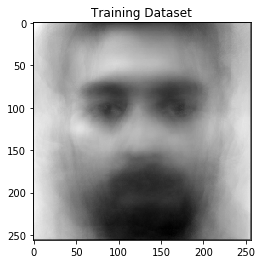

In [10]:
list1 = [cv2.resize(cv2.imread('./Data_Set/Set_1/JPG/' + str(i) + '.JPG', 0), (256, 256)) for i in range(1,75)]


x_imgs = list1 

x_imgs=np.array(x_imgs)
x_train = ([i.flatten() for i in x_imgs])
pca = PCA(n_components=30)
pca.fit(x_train)
x_tr_pca = pca.transform(x_train)
plt.imshow(pca.mean_.reshape(x_imgs[0].shape), cmap='gray')
plt.title('Training Dataset');



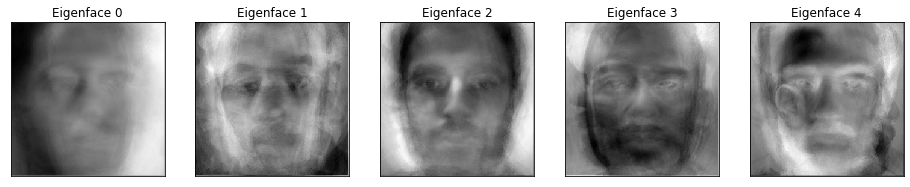

In [5]:
fig = plt.figure(figsize=(16, 6))

for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(x_imgs[0].shape), 'gray')
    plt.title('Eigenface {}'.format(i))
    


In [7]:
list1 = [cv2.resize(cv2.imread('./Data_Set/Set_2/JPG/Hakim/faces/' + str(i) + '.JPG', 0), (256, 256)) for i in range(1,14)]
list2 = [cv2.resize(cv2.imread('./Data_Set/Set_2/JPG/Hamza/faces/' + str(i) + '.JPG', 0), (256, 256)) for i in range(1,14)]
list3 = [cv2.resize(cv2.imread('./Data_Set/Set_2/JPG/Mahin/faces/' + str(i) + '.JPG', 0), (256, 256)) for i in range(1,14)]
list4 = [cv2.resize(cv2.imread('./Data_Set/Set_2/JPG/Nareg/faces/' + str(i) + '.JPG', 0), (256, 256)) for i in range(1,14)]
list5 = [cv2.resize(cv2.imread('./Data_Set/Set_2/JPG/Wasif/faces/' + str(i) + '.JPG', 0), (256, 256)) for i in range(1,14)]

x_test_img=list1+list2+list3+list4+list5



# Transform test dataset 
x_test = np.array([i.flatten() for i in x_test_img])
x_tstpca = pca.transform(x_test)
      
        

# Creating labels
labels = {0:'hakim', 1:'hamza', 2:'mahin', 3:'nareg', 4: 'wasif'}

# correct labels for test set
y_test = np.array([[0]*14, [1]*14, [2]*14, [3]*14, [4]*14]).flatten()

# correct labels for train set
y_train =  np.array([[0]*15, [1]*15, [2]*15, [3]*15, [4]*15]).flatten()



In [11]:
correct = []
predictions=[]
for i, x_test in enumerate(x_tstpca, start=0):
    index = np.argmin(np.linalg.norm(x_tstpca[i]  - x_tr_pca, axis=1))
    
    # Comparing the labels
    print('Predicted = {}\t|\tActual = {}'.format(labels[y_train[index]], labels[y_test[i]]))
    predictions.append(y_train[index])
    # Adding 1 if prediction is correct
    correct.append(labels[y_train[index]] == labels[y_test[i]])

print('\n Accuracy ='+ str((sum(correct)/float(len(x_tstpca)))))

Predicted = mahin	|	Actual = hakim
Predicted = nareg	|	Actual = hakim
Predicted = nareg	|	Actual = hakim
Predicted = hamza	|	Actual = hakim
Predicted = hamza	|	Actual = hakim
Predicted = nareg	|	Actual = hakim
Predicted = nareg	|	Actual = hakim
Predicted = wasif	|	Actual = hakim
Predicted = wasif	|	Actual = hakim
Predicted = wasif	|	Actual = hakim
Predicted = nareg	|	Actual = hakim
Predicted = nareg	|	Actual = hakim
Predicted = wasif	|	Actual = hakim
Predicted = mahin	|	Actual = hakim
Predicted = hamza	|	Actual = hamza
Predicted = hamza	|	Actual = hamza
Predicted = hamza	|	Actual = hamza
Predicted = hamza	|	Actual = hamza
Predicted = nareg	|	Actual = hamza
Predicted = nareg	|	Actual = hamza
Predicted = hamza	|	Actual = hamza
Predicted = hamza	|	Actual = hamza
Predicted = hamza	|	Actual = hamza
Predicted = hamza	|	Actual = hamza
Predicted = hamza	|	Actual = hamza
Predicted = hamza	|	Actual = hamza
Predicted = mahin	|	Actual = hamza
Predicted = hamza	|	Actual = hamza
Predicted = hamza	|	

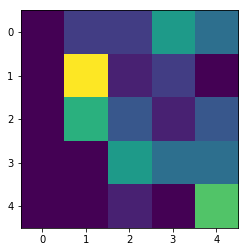

In [40]:
plt.imshow(confusion_matrix(y_test[:65], predictions))